# Importing Libraries

In [168]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

import statistics
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

# Loading Data

In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Exploration

In [4]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
pd.options.display.max_rows=100

### Checking the coorelation between variables

In [7]:
train_df_corr=train_df.corr()

In [8]:
train_df_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Exported


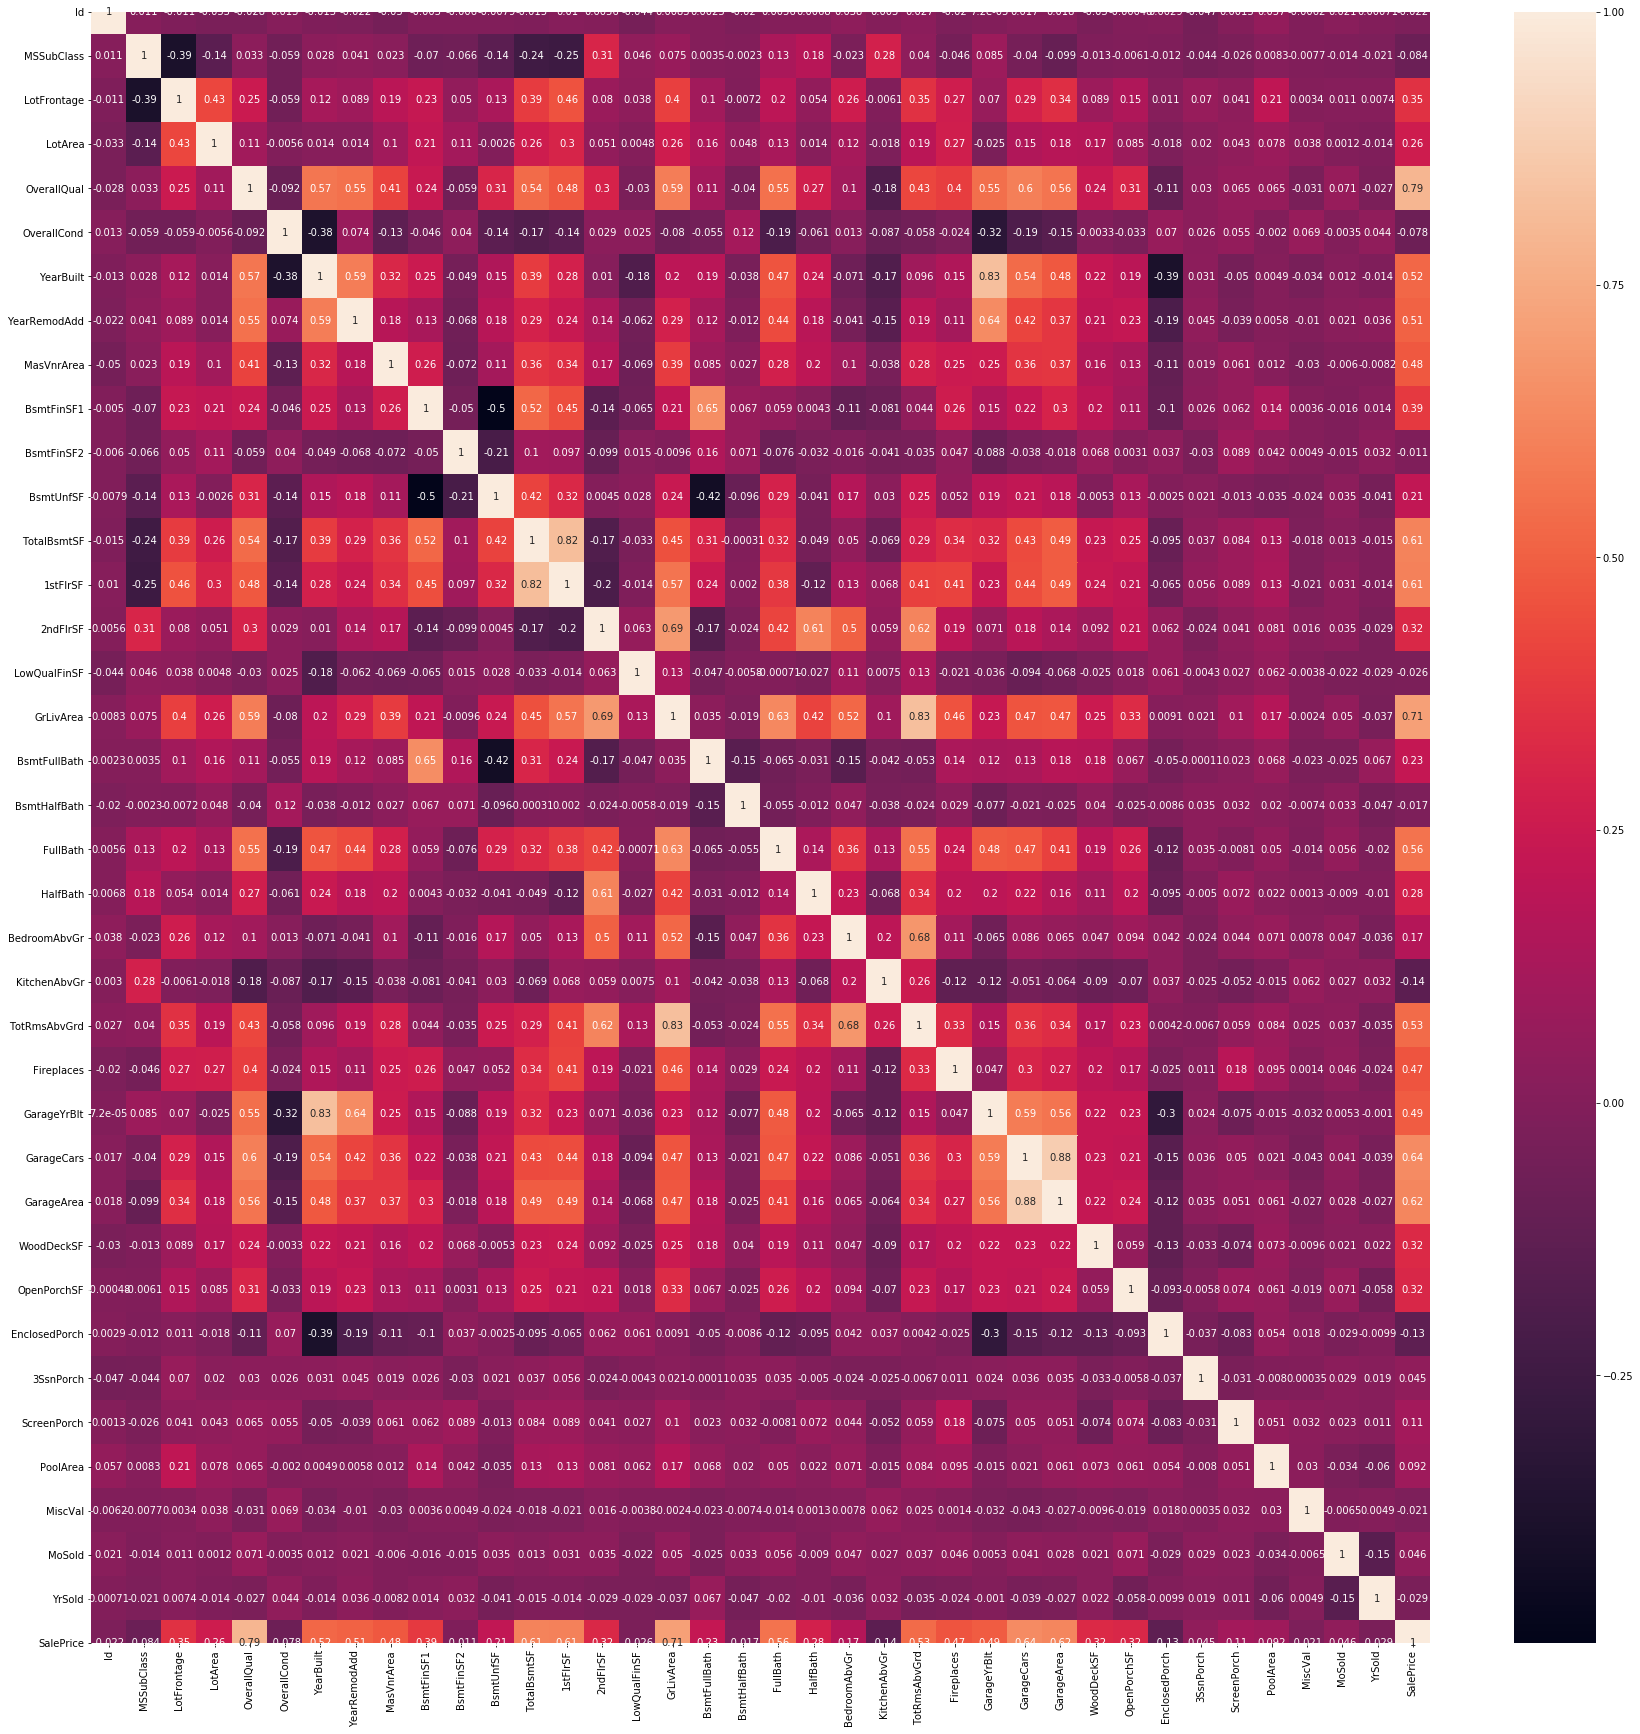

In [9]:
fig, ax = plt.subplots(figsize=(30,30))
figure=sns.heatmap(train_df_corr, annot=True,ax=ax, vmax=1)
train_heat_map=figure.get_figure()
train_heat_map.savefig('svm_conf.png', dpi=600)
print('Exported')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Studying skewness in Sales Price

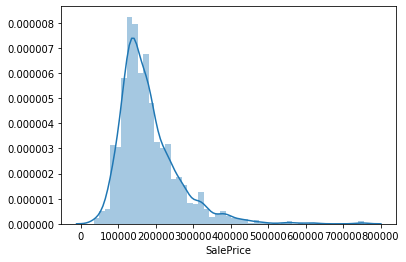

In [11]:
sns.distplot(train_df.SalePrice)

### Studying scatter plots

In [12]:
data=pd.concat([train_df['LotFrontage'], train_df['SalePrice']], axis = 1)
data.describe()

,LotFrontage,SalePrice
count,1201.000000,1460.000000
mean,70.049958,180921.195890
std,24.284752,79442.502883
min,21.000000,34900.000000
25%,59.000000,129975.000000
50%,69.000000,163000.000000
75%,80.000000,214000.000000
max,313.000000,755000.000000


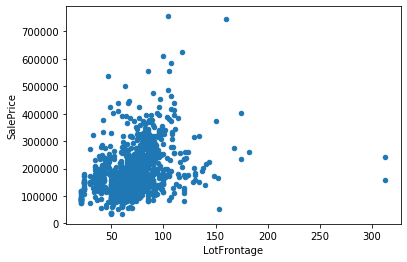

In [13]:
data.plot.scatter(x='LotFrontage', y='SalePrice')

In [14]:
data1=pd.concat((train_df.GrLivArea,train_df.SalePrice),axis=1)
data1.describe()

,GrLivArea,SalePrice
count,1460.000000,1460.000000
mean,1515.463699,180921.195890
std,525.480383,79442.502883
min,334.000000,34900.000000
25%,1129.500000,129975.000000
50%,1464.000000,163000.000000
75%,1776.750000,214000.000000
max,5642.000000,755000.000000


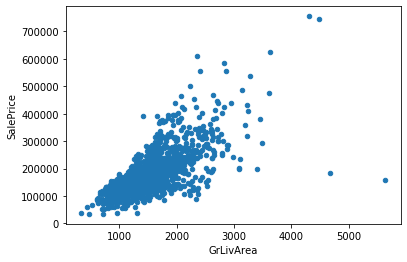

In [15]:
data1.plot.scatter(x='GrLivArea',y='SalePrice')

In [16]:
data2=pd.concat((train_df.TotalBsmtSF,train_df.SalePrice), axis=1)
data2.head()

,TotalBsmtSF,SalePrice
0,856,208500
1,1262,181500
2,920,223500
3,756,140000
4,1145,250000


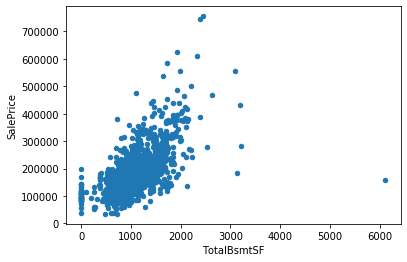

In [17]:
data2.plot.scatter(x='TotalBsmtSF',y='SalePrice')

In [18]:
data3=pd.concat((train_df.GarageArea ,train_df.SalePrice),axis=1)
data3.head()

,GarageArea,SalePrice
0,548,208500
1,460,181500
2,608,223500
3,642,140000
4,836,250000


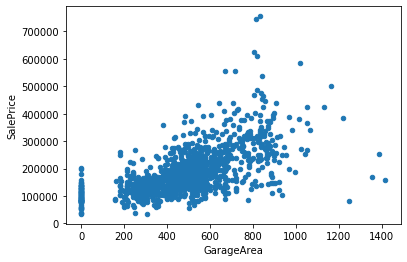

In [19]:
data3.plot.scatter(x='GarageArea',y='SalePrice')

In [20]:
null_cols=[]
for col in train_df.columns:
    if train_df[col].isnull().sum() > 0:
        print('Column', col, 'has', train_df[col].isnull().sum(), 'null values')
        null_cols.append(col)
    

Column LotFrontage has 259 null values
Column Alley has 1369 null values
Column MasVnrType has 8 null values
Column MasVnrArea has 8 null values
Column BsmtQual has 37 null values
Column BsmtCond has 37 null values
Column BsmtExposure has 38 null values
Column BsmtFinType1 has 37 null values
Column BsmtFinType2 has 38 null values
Column Electrical has 1 null values
Column FireplaceQu has 690 null values
Column GarageType has 81 null values
Column GarageYrBlt has 81 null values
Column GarageFinish has 81 null values
Column GarageQual has 81 null values
Column GarageCond has 81 null values
Column PoolQC has 1453 null values
Column Fence has 1179 null values
Column MiscFeature has 1406 null values


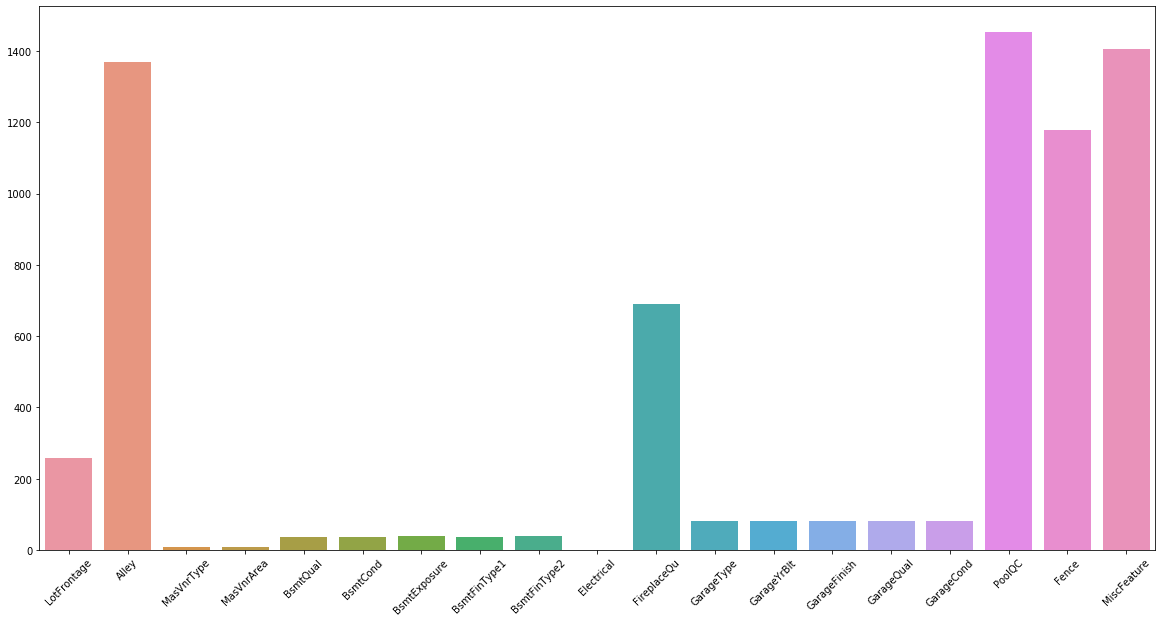

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x=train_df[null_cols].isnull().sum().index, y=train_df[null_cols].isnull().sum().values)
xticks(rotation=45)
plt.show()

In [22]:
train_df[null_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Data Wrangling

### Checking the missing value in Electrical column and Filling the missing value

In [23]:
train_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [24]:
train_df.Electrical=train_df.Electrical.fillna('SBrkr')

### Changing other Null values

In [25]:
for col in train_df.columns:
    if train_df[col].dtypes == 'O':
        train_df[col]=train_df[col].replace(np.nan,"None")
    else:
        train_df[col]=train_df[col].replace(np.nan,train_df[col].median())

### Studying the relationship of Year features with target variable

In [26]:
yr_vals=[]
for col in train_df.columns:
    if "Yr" in col or "Year" in col:
        yr_vals.append(col)
yr_vals=set(yr_vals)
yr_vals
    

{'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'}

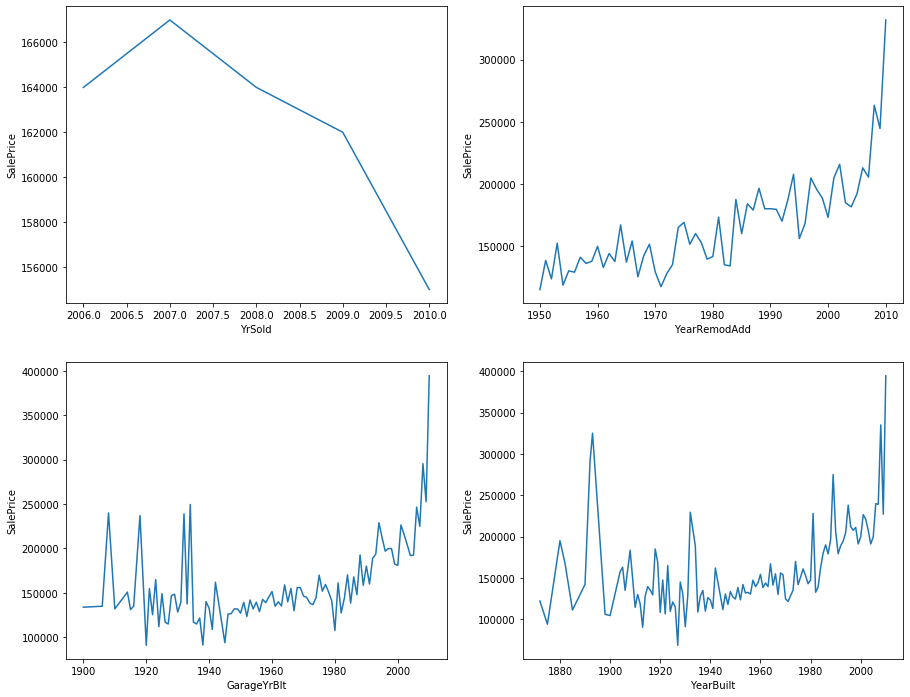

In [27]:
plt.figure(figsize=(15,12))
for idx, col in enumerate(yr_vals):
    plt.subplot(2,2,idx+1)
    plt.plot(train_df.groupby(col)['SalePrice'].median())
    plt.xlabel(col)
    plt.ylabel('SalePrice')

### Adding new features in the training data set

In [28]:
train_df['HouseAge']=train_df['YrSold']-train_df['YearBuilt']
train_df['RemodelAge']=train_df['YrSold']-train_df['YearRemodAdd']
train_df['GarageAge']=train_df['YrSold']-train_df['GarageYrBlt']

train_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

### Differentiating Between Numeric and Alpha Numeric Data 

In [29]:
num_col=[]
val_col=[]

for col in train_df.columns:
    if train_df[col].dtypes == 'O':
        val_col.append(col)
    else:
        num_col.append(col)
print(num_col)
print(val_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'HouseAge', 'RemodelAge', 'GarageAge']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQua

### Differentiating Between Continuous and Discrete variables in Numerical column

In [30]:
num_cont=[]
num_disc=[]

for col in num_col:
    if train_df[col].nunique()>25:
        num_cont.append(col)
        
    else:
        num_disc.append(col)
        
print ('Continuous numerical variables are ',num_cont)
print('-----------------------------------')
print ('Discrete numerical variables are ' ,num_disc)

Continuous numerical variables are  ['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'HouseAge', 'RemodelAge', 'GarageAge']
-----------------------------------
Discrete numerical variables are  ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


### Checking variance using Histograms

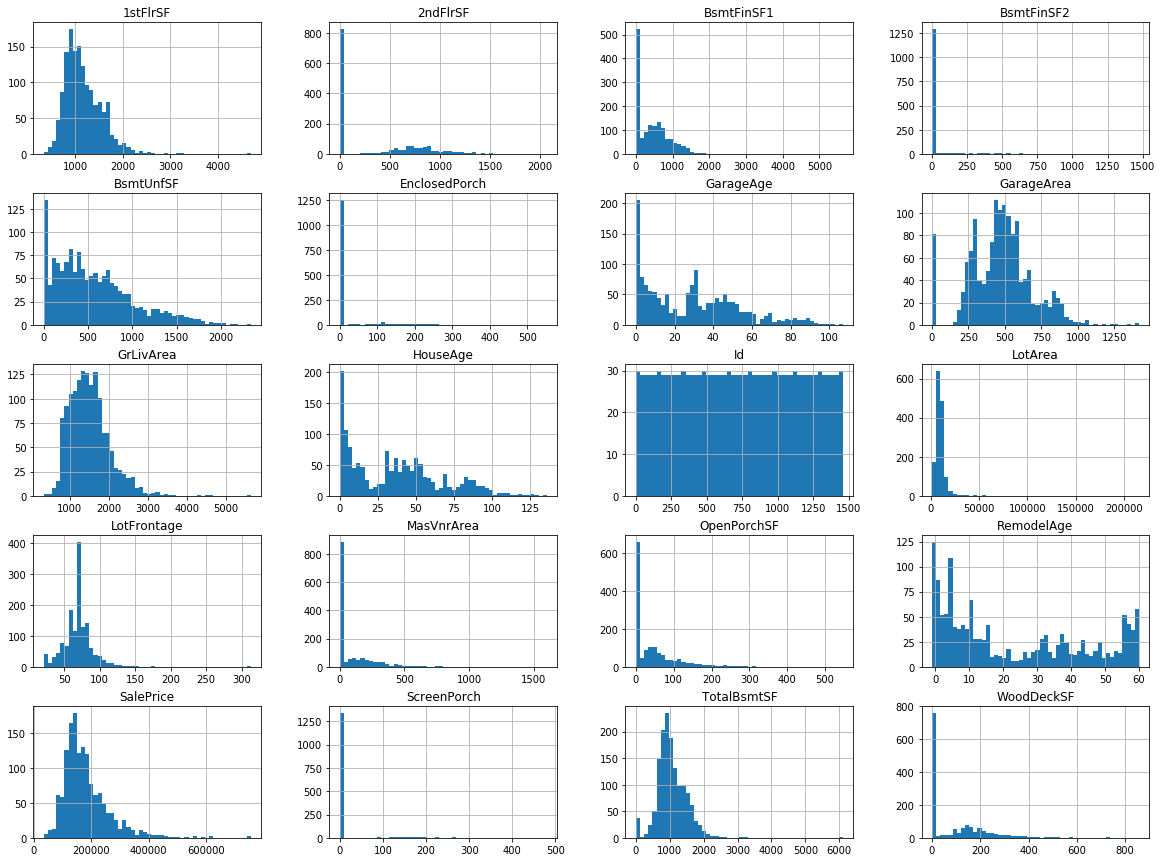

In [31]:
train_df.hist(num_cont, bins=50, figsize=(20,15))
#plt.tight_layout(pad=0.4)
plt.show()

In [32]:
for col in num_cont:
    print(train_df[col].value_counts())
    print('\n')

1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64


69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
33.0       1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64


7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64


0.0      869
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


0       467
24       12
16        9
20        5
686       5
       ... 
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64


0       1293
180        5
374        3
551        2
93         2
        ... 
532        1
544        1
546        1
5

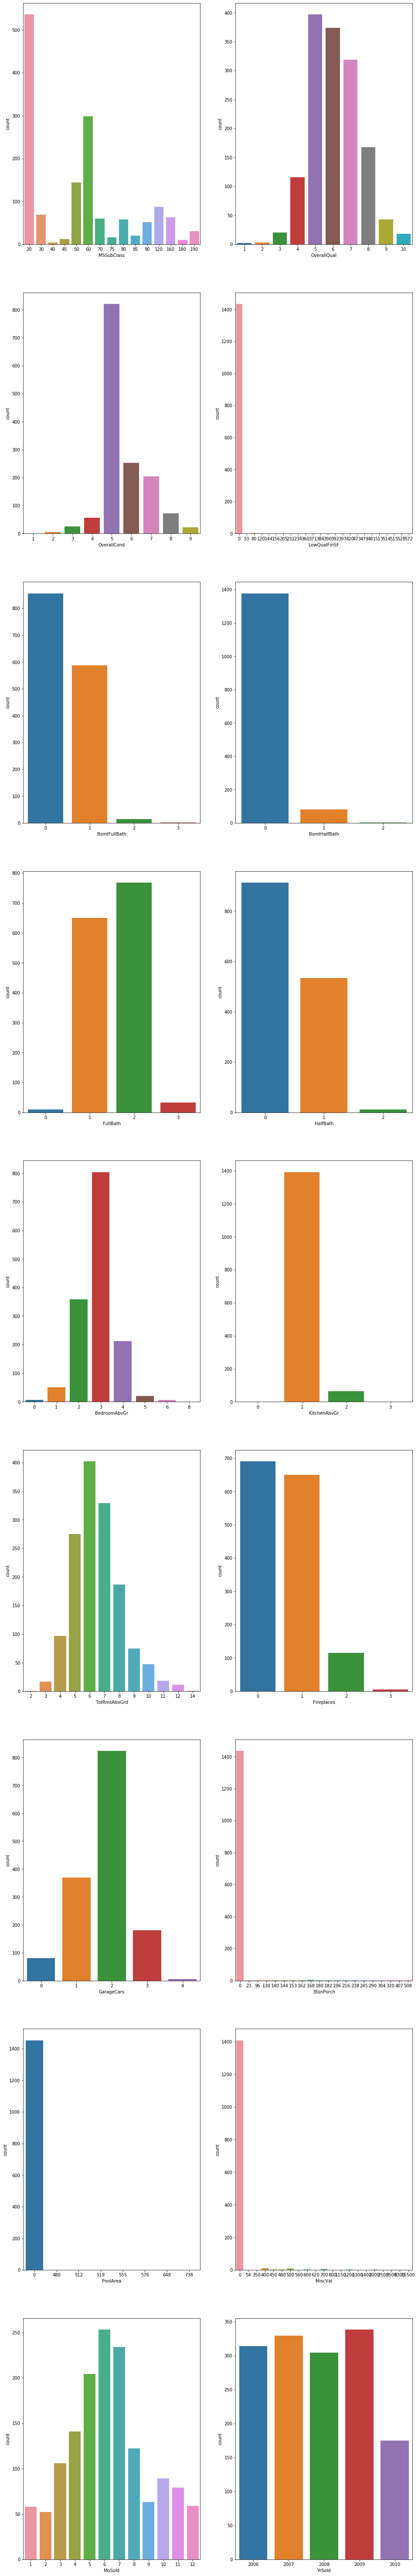

In [33]:
plt.figure(figsize=(16,108))
for idx,col in enumerate(num_disc):
    plt.subplot(9,2,idx+1)
    ax=sns.countplot(train_df[col])

### Checking variance for catagorical variables

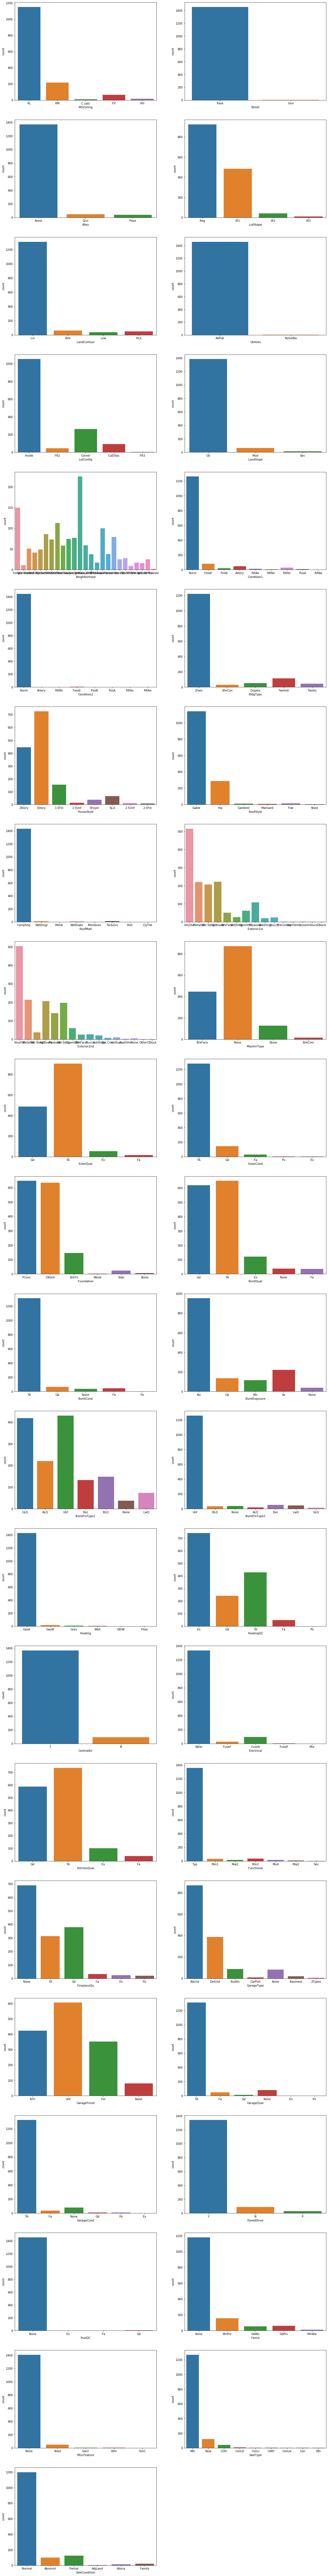

In [34]:
plt.figure(figsize=(20,200))
for idx,col in enumerate(val_col):
    plt.subplot(26,2,idx+1)
    ax=sns.countplot(train_df[col])

### Removing Columns with low variance

In [35]:
low_var_num_cont = ['MasVnrArea','BsmtFinSF2','2ndFlrSF','EnclosedPorch','ScreenPorch']

low_var_num_disc = ['LowQualFinSF','BsmtHalfBath','KitchenAbvGr','3SsnPorch','PoolArea','MiscVal']

low_var_cat_vars = ['MSZoning','Alley','LandContour','Utilities','LotConfig','Condition1','LandSlope','Condition2','BldgType','RoofStyle','RoofMatl','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','SaleType','SaleCondition','Street','Fence','MiscFeature']

train_df.drop(low_var_num_cont,1,inplace= True)
train_df.drop(low_var_num_disc,1,inplace= True)
train_df.drop(low_var_cat_vars,1,inplace= True)

num_cont = list(set(num_cont)-set(low_var_num_cont))
num_disc = list(set(num_disc)-set(low_var_num_disc))
val_col = list(set(val_col)-set(low_var_cat_vars))
       
num_vars = num_cont + num_disc

In [36]:
num_vars

['RemodelAge',
 'BsmtFinSF1',
 'Id',
 'HouseAge',
 'OpenPorchSF',
 'WoodDeckSF',
 'LotArea',
 'GarageAge',
 '1stFlrSF',
 'GrLivArea',
 'SalePrice',
 'LotFrontage',
 'GarageArea',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'HalfBath',
 'TotRmsAbvGrd',
 'BsmtFullBath',
 'FullBath',
 'GarageCars',
 'OverallCond',
 'BedroomAbvGr',
 'YrSold',
 'MoSold',
 'OverallQual',
 'Fireplaces',
 'MSSubClass']

### Handling Skewness of data

In [37]:
train_df.SalePrice=np.log(train_df.SalePrice)

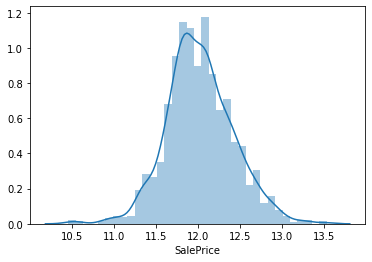

In [38]:
sns.distplot(train_df.SalePrice)

### Variation of continuous numeric variable with respect to sale price

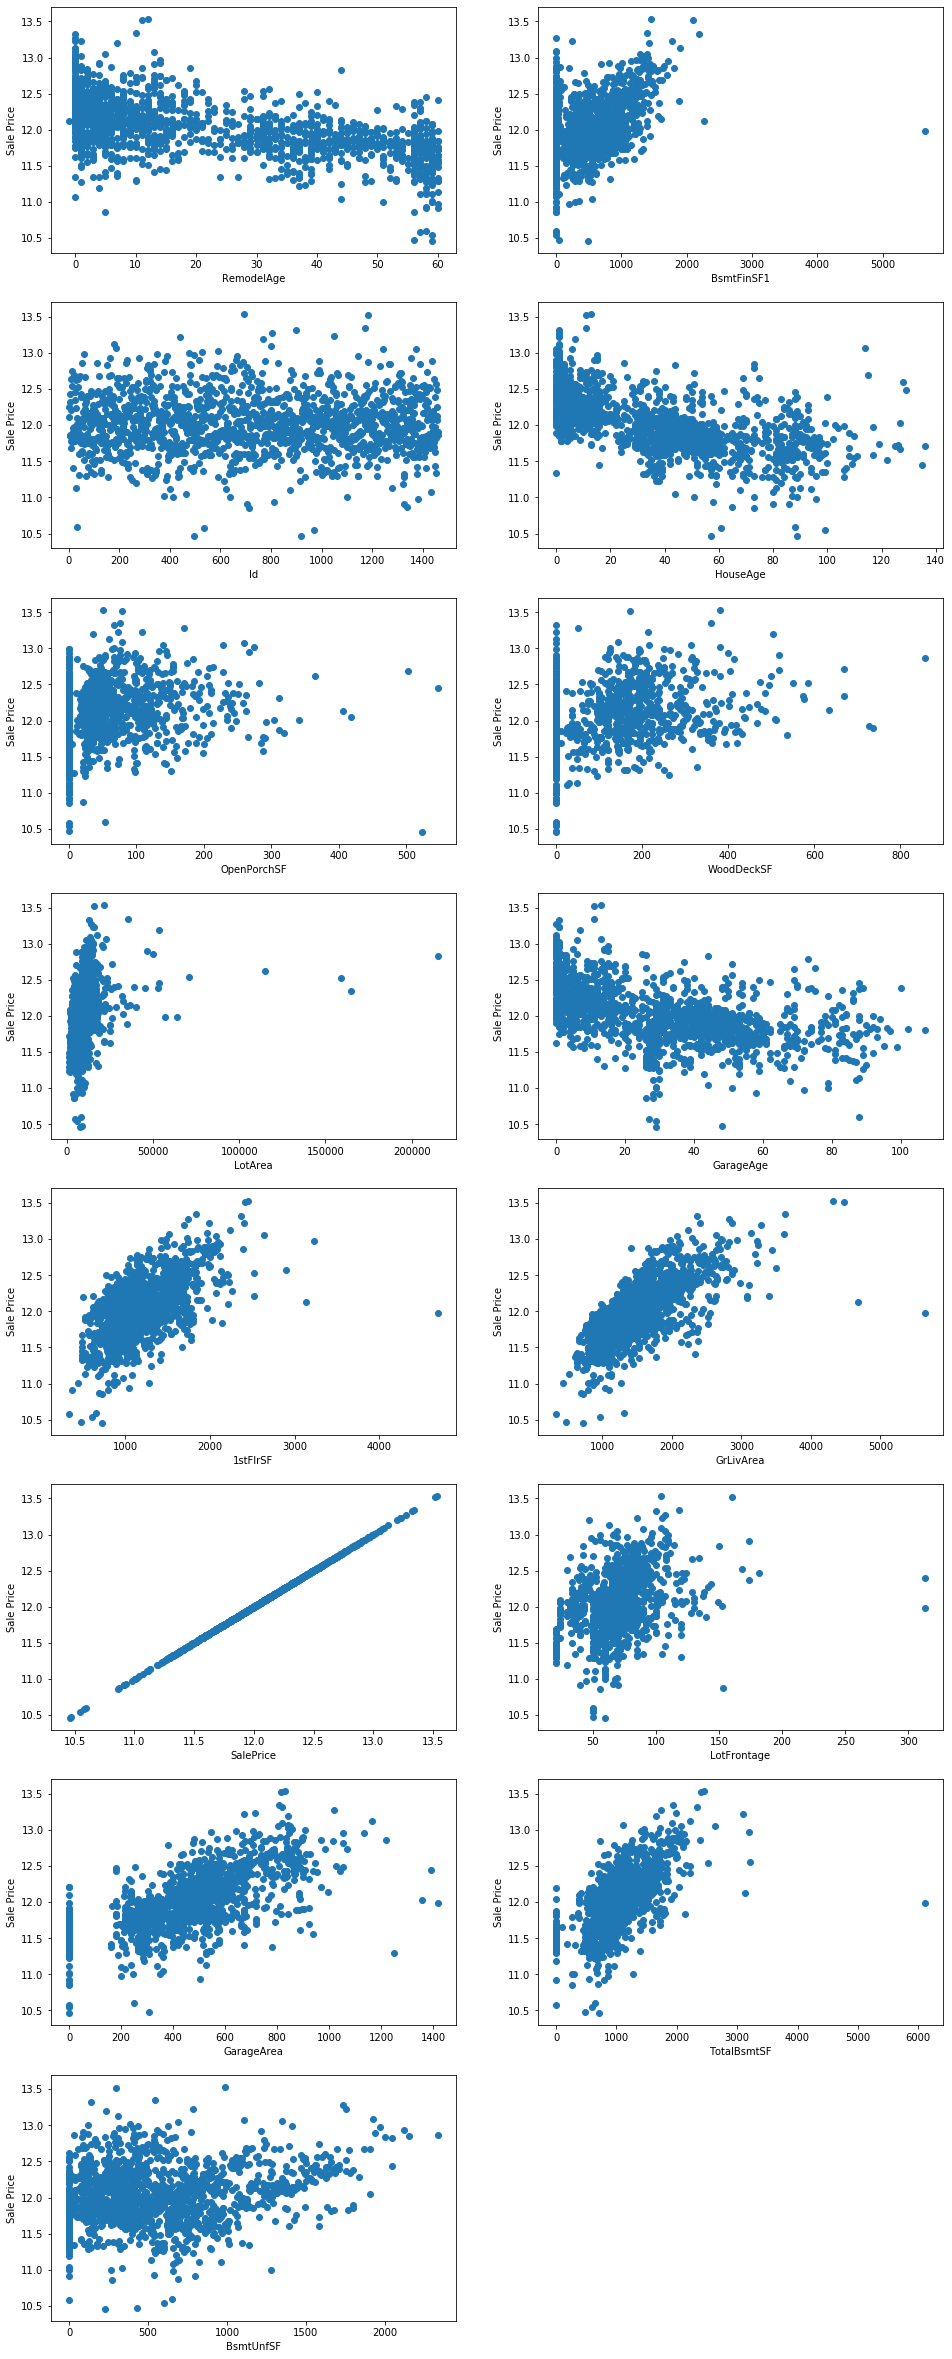

In [39]:
plt.figure(figsize=(16,48))
for idx,col in enumerate(num_cont):
    plt.subplot(9,2,idx+1)
    plt.scatter(x=train_df[col],y=train_df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    #plt.show()

### Variation of discrete numeric variable with respect to sale price

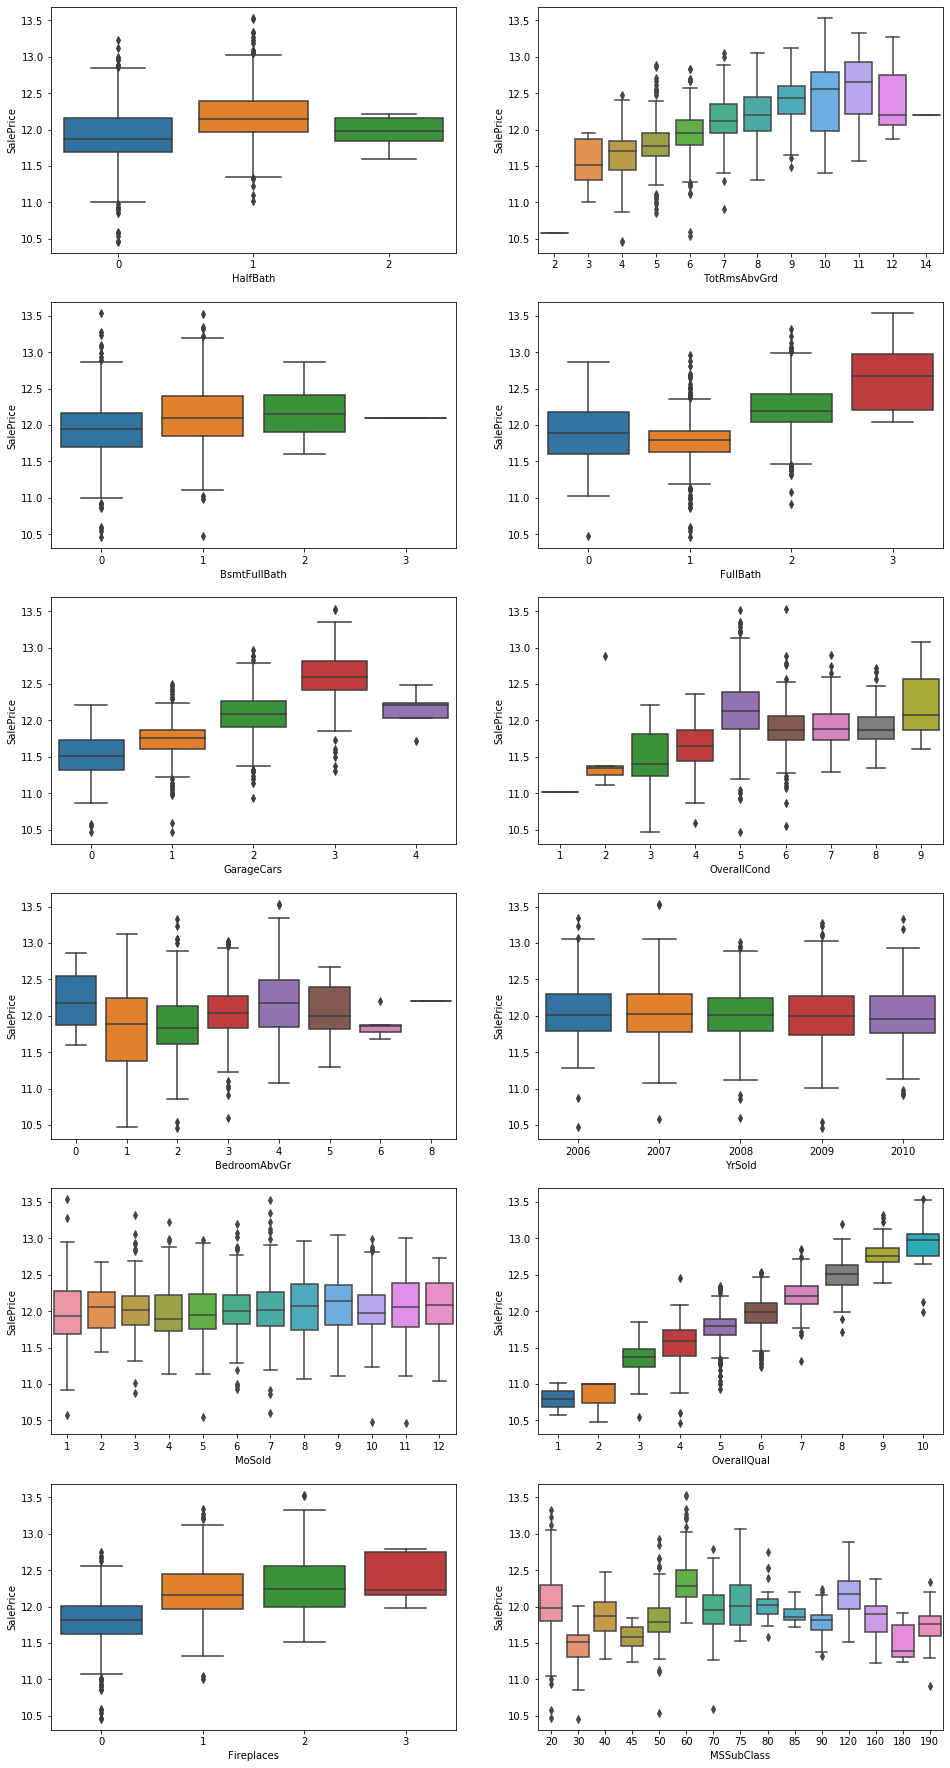

In [40]:
plt.figure(figsize=(16,48))
for idx,col in enumerate(num_disc):
    plt.subplot(9,2,idx+1)
    sns.boxplot(x=train_df[col], y=train_df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')

In [41]:
train_df.drop(['MSSubClass','YrSold','MoSold'],1,inplace= True)

num_disc = list(set(num_disc)-set(['MSSubClass','YrSold','MoSold']))
num_vars = list(set(num_vars)-set(['MSSubClass','YrSold','MoSold']))

### Variation of categorical variable with respect to sale price

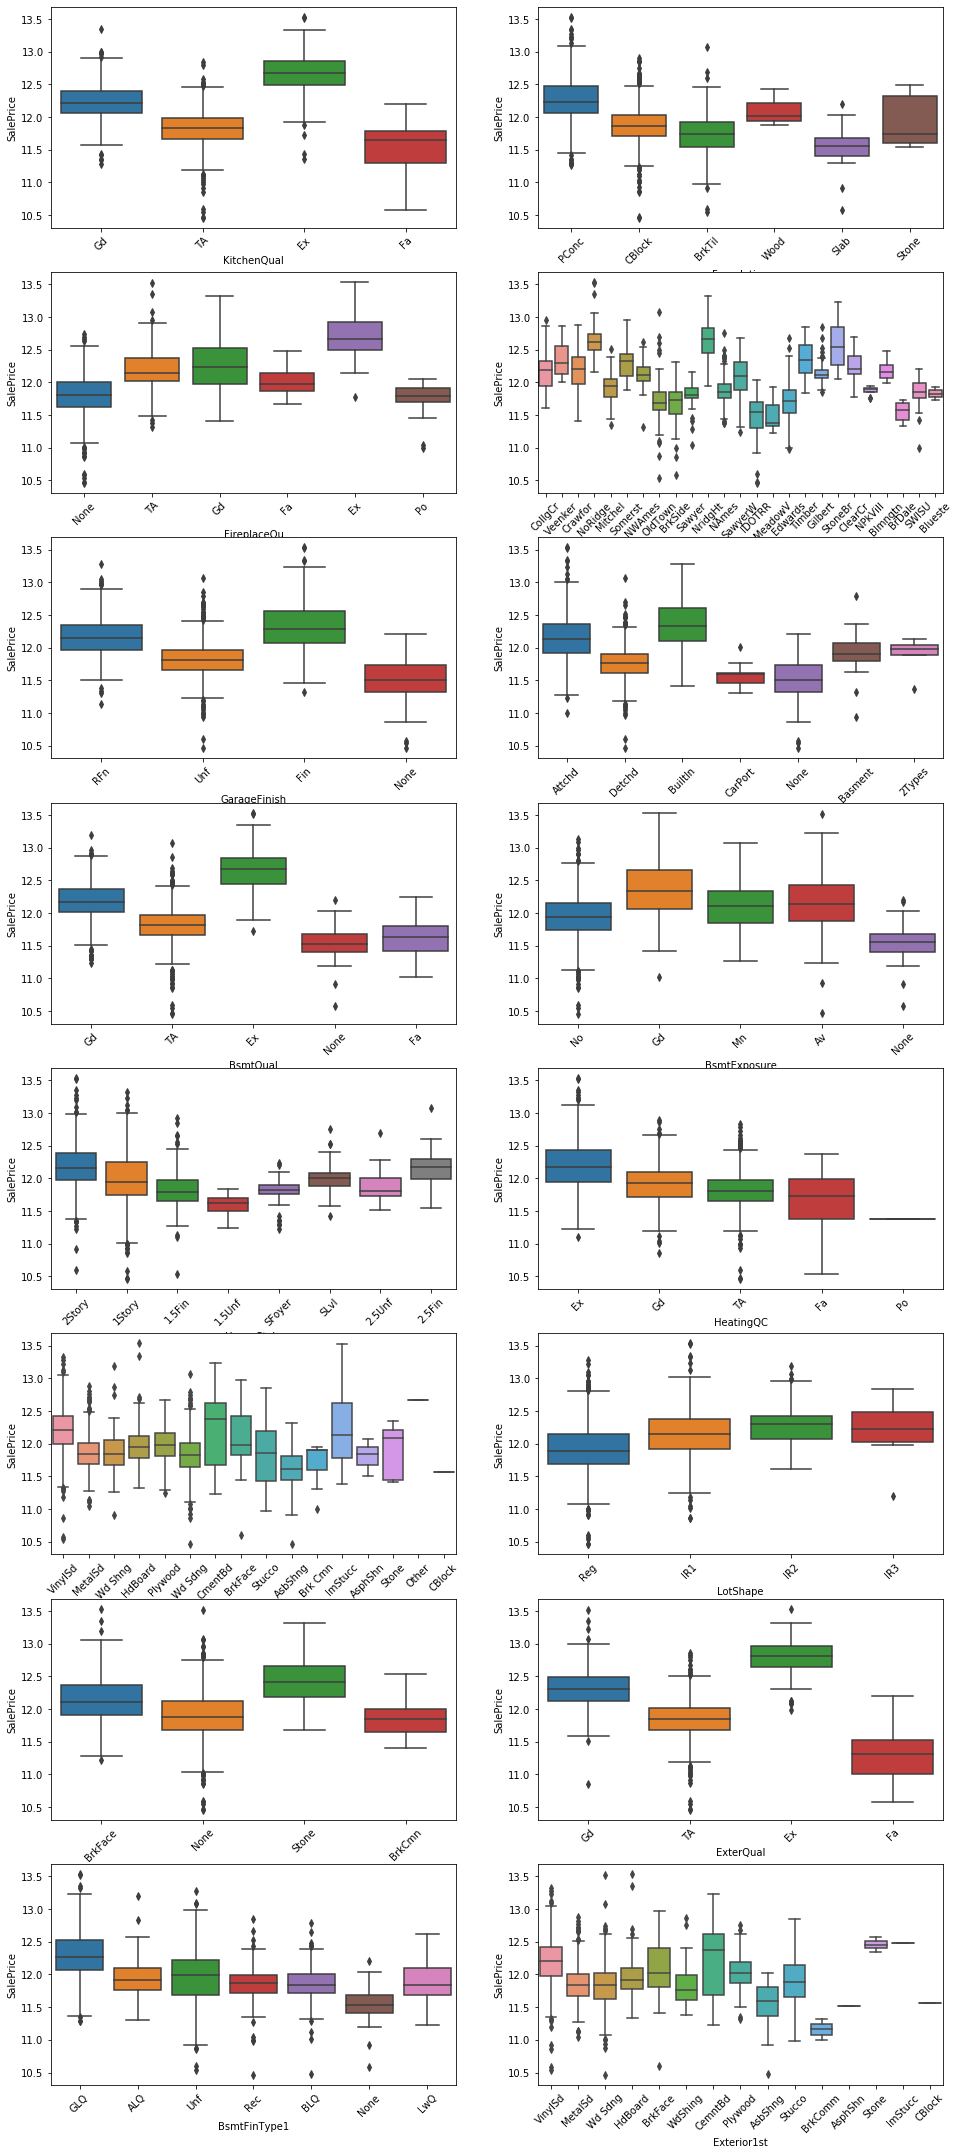

In [42]:
plt.figure(figsize=(16,48))
for idx,col in enumerate(val_col):
    plt.subplot(10,2,idx+1)
    sns.boxplot(x = train_df[col],y=train_df["SalePrice"])
    xticks(rotation=45)
    plt.ylabel("SalePrice")
    plt.xlabel(col)

### Checking for outliers in all the numerical variables

In [43]:
train_df.shape

(1460, 40)

### Checking for outliers

In [44]:
Q1 = train_df[num_vars].quantile(0.25)
Q3 = train_df[num_vars].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RemodelAge        37.000000
HalfBath           1.000000
BsmtFinSF1       712.250000
TotRmsAbvGrd       2.000000
HouseAge          46.000000
BsmtFullBath       1.000000
OpenPorchSF       68.000000
WoodDeckSF       168.000000
GarageAge         39.000000
GrLivArea        647.250000
SalePrice          0.498634
TotalBsmtSF      502.500000
BsmtUnfSF        585.000000
Id               729.500000
FullBath           1.000000
GarageCars         1.000000
OverallCond        1.000000
LotArea         4048.000000
BedroomAbvGr       1.000000
1stFlrSF         509.250000
OverallQual        2.000000
LotFrontage       19.000000
GarageArea       241.500000
Fireplaces         1.000000
dtype: float64


In [45]:
print(num_cont)

['RemodelAge', 'BsmtFinSF1', 'Id', 'HouseAge', 'OpenPorchSF', 'WoodDeckSF', 'LotArea', 'GarageAge', '1stFlrSF', 'GrLivArea', 'SalePrice', 'LotFrontage', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF']


In [46]:
for col in num_vars:
    print(train_df[col].describe(percentiles=[0.05,0.10,0.15,0.25,0.50,0.75,0.9,0.99]
                               ))

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
5%          0.000000
10%         1.000000
15%         2.000000
25%         4.000000
50%        14.000000
75%        41.000000
90%        56.000000
99%        60.000000
max        60.000000
Name: RemodelAge, dtype: float64
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
5%          0.000000
10%         0.000000
15%         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
99%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
5%          0.000000
10%         0.000000
15%         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
90%      1065.500000
99%      1572.410000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000


In [47]:
q3=train_df['TotalBsmtSF'].quantile(0.99)
train_df=train_df[train_df['TotalBsmtSF'] <= q3]

q3 = train_df['OpenPorchSF'].quantile(0.99)
train_df = train_df[train_df.OpenPorchSF <= q3]
    
q3 = train_df['GarageArea'].quantile(0.99)
train_df = train_df[train_df.GarageArea <= q3]

q3 = train_df['BsmtUnfSF'].quantile(0.99)
train_df = train_df[train_df.BsmtUnfSF <= q3]

q3 = train_df['WoodDeckSF'].quantile(0.99)
train_df = train_df[train_df.WoodDeckSF <= q3]

q3 = train_df['BsmtFinSF1'].quantile(0.99)
train_df = train_df[train_df.BsmtFinSF1 <= q3]

In [48]:
train_df.shape

(1372, 40)

In [49]:
train_df.drop('Id',inplace=True,axis=1)

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1458
Data columns (total 39 columns):
LotFrontage     1372 non-null float64
LotArea         1372 non-null int64
LotShape        1372 non-null object
Neighborhood    1372 non-null object
HouseStyle      1372 non-null object
OverallQual     1372 non-null int64
OverallCond     1372 non-null int64
Exterior1st     1372 non-null object
Exterior2nd     1372 non-null object
MasVnrType      1372 non-null object
ExterQual       1372 non-null object
Foundation      1372 non-null object
BsmtQual        1372 non-null object
BsmtExposure    1372 non-null object
BsmtFinType1    1372 non-null object
BsmtFinSF1      1372 non-null int64
BsmtUnfSF       1372 non-null int64
TotalBsmtSF     1372 non-null int64
HeatingQC       1372 non-null object
1stFlrSF        1372 non-null int64
GrLivArea       1372 non-null int64
BsmtFullBath    1372 non-null int64
FullBath        1372 non-null int64
HalfBath        1372 non-null int64
BedroomAbvGr   

# Feature Engineering

In [51]:
test_df=pd.read_csv('test.csv')

In [52]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [53]:
test_df_id=test_df.Id
test_df.drop("Id",1,inplace=True)

In [54]:
train_df_sp=train_df.SalePrice
train_df.drop('SalePrice',axis=1,inplace=True)

In [55]:
for col in test_df.columns:
    if test_df[col].dtypes == 'O':
        test_df[col] = test_df[col].replace(np.nan,"None")
    else:
        test_df[col] = test_df[col].replace(np.nan,test_df[col].median())


In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 no

In [57]:
test_df['HouseAge'] =  test_df['YrSold'] - test_df['YearBuilt']
test_df['RemodAddAge'] = test_df['YrSold'] - test_df['YearRemodAdd']
test_df['GarageAge'] = test_df['YrSold'] - test_df['GarageYrBlt'] 

test_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

In [58]:
num_test_set=[]
var_test_set=[]
for col in test_df.columns:
    if test_df[col].dtypes =='O':
        var_test_set.append(col)
    else:
        num_test_set.append(col)
        
print(num_test_set)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'HouseAge', 'RemodAddAge', 'GarageAge']


In [59]:
num_test_set_disc=[]
num_test_set_cont=[]

for col in num_test_set:
    if test_df[col].nunique() > 25:
        num_test_set_cont.append(col)
    else:
        num_test_set_disc.append(col)
        
print(num_test_set_disc)
print('-----------------------')
print(num_test_set_cont)
        
        

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold', 'YrSold']
-----------------------
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'HouseAge', 'RemodAddAge', 'GarageAge']


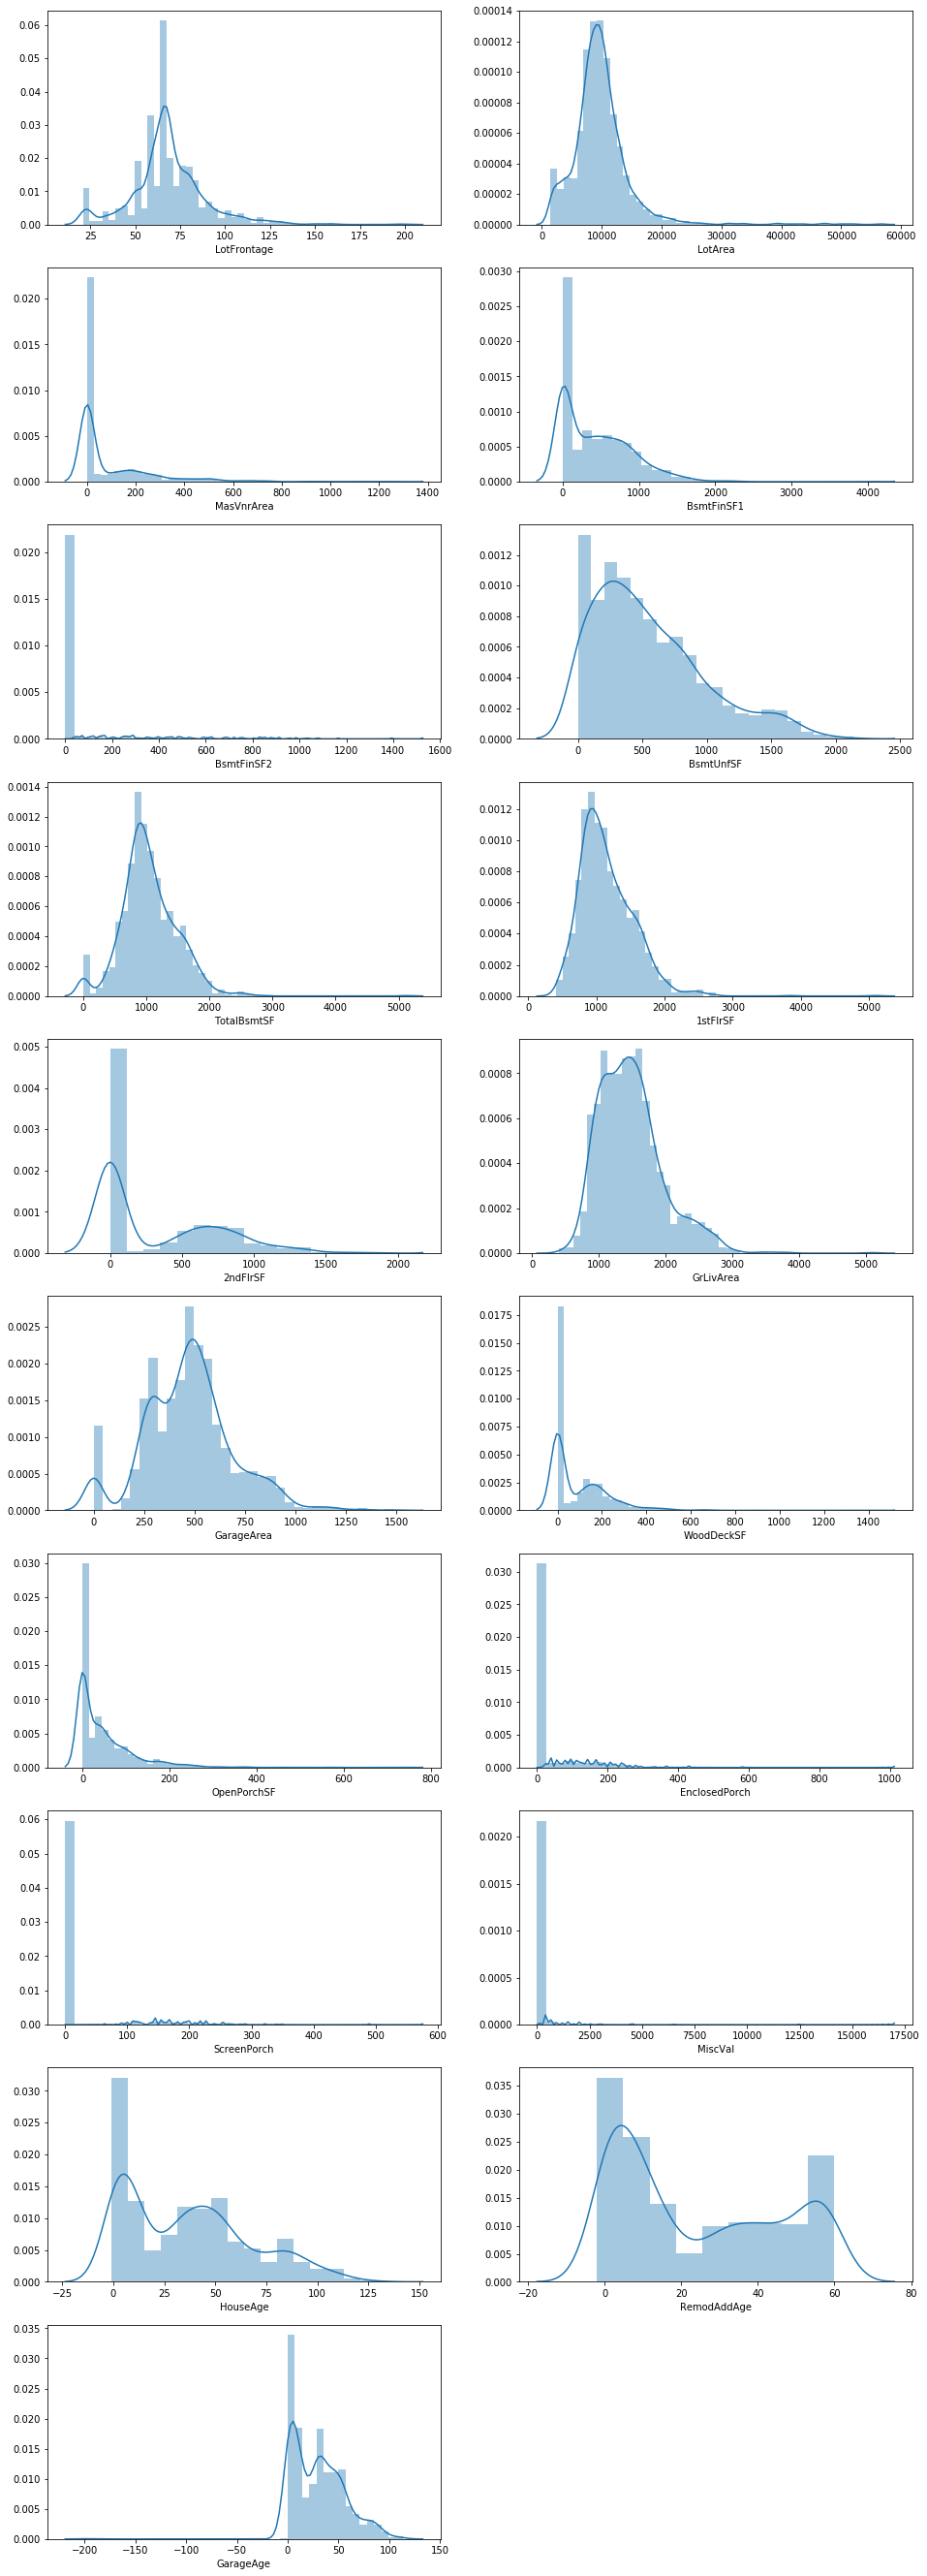

In [60]:
plt.figure(figsize=(16,48))
for idx, col in enumerate(num_test_set_cont):
    plt.subplot(10,2,idx+1)
    sns.distplot(test_df[col])

In [61]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for col in num_features:
    test_df[col] = np.log(test_df[col])

In [62]:
test_df.drop(low_var_num_cont,1,inplace= True)
test_df.drop(low_var_num_disc,1,inplace= True)
test_df.drop(low_var_cat_vars,1,inplace= True)

test_df.drop(['MSSubClass','YrSold','MoSold'],1,inplace= True)       

In [63]:
master_set=pd.concat((train_df,test_df)).reset_index(drop=True)

C:\Users\shaun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [64]:
master_set.shape

(2831, 39)

In [65]:
# We have ordinal variables present in the dataest, lets treat them first:
master_set['ExterQual'] = master_set['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master_set['BsmtQual'] = master_set['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master_set['BsmtExposure'] = master_set['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
master_set['BsmtFinType1'] = master_set['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
master_set['HeatingQC'] = master_set['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master_set['KitchenQual'] = master_set['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
master_set['GarageFinish'] = master_set['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
master_set['FireplaceQu'] = master_set['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})

In [66]:
num_test_set1=[]
var_test_set1=[]
for col in master_set.columns:
    if master_set[col].dtypes =='O':
        var_test_set1.append(col)
    else:
        num_test_set1.append(col)
        
print(var_test_set1)

['Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'HouseStyle', 'LotShape', 'MasVnrType', 'Neighborhood']


In [67]:
master_dummies = pd.get_dummies(master_set[var_test_set1], drop_first=True)

In [68]:
master_set.drop(var_test_set1,inplace=True,axis=1)

In [69]:
master_set=pd.concat([master_set,master_dummies],axis=1)

In [70]:
master_set.shape

(2831, 110)

In [71]:
train_set = master_set[:1372]
test_set = master_set[1372:]

In [72]:
train_set.shape

(1372, 110)

# Scaling of Data

In [73]:
scaler=MinMaxScaler()

In [74]:
y = train_df_sp.reset_index(drop=True)

In [75]:
scaler.fit(train_set)
X = scaler.transform(train_set)

C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [76]:
X = pd.DataFrame(X,columns = train_set.columns).reset_index(drop=True)
X.head()

,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,ExterQual,FireplaceQu,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.203588,0.375,0.25,0.484890,1.000000,0.333333,0.8,0.084842,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.361934,0.375,1.00,0.671703,0.833333,0.000000,0.8,0.160633,0.333333,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.228549,0.375,0.50,0.333791,1.000000,0.333333,0.8,0.245475,0.666667,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.244540,0.375,0.25,0.148352,0.833333,0.333333,0.6,0.305430,0.333333,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.316303,0.500,0.75,0.449863,1.000000,0.333333,0.8,0.277149,0.666667,0.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
scaler.fit(test_set)
test_set = scaler.transform(test_set)
test_set = pd.DataFrame(test_set,columns = train_set.columns).reset_index(drop=True)

C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:355: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [78]:
test_set.head()

,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,ExterQual,FireplaceQu,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.312253,0.333333,0.25,0.116708,0.500000,0.0,0.6,0.126168,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.468253,0.500000,0.25,0.230175,0.833333,0.0,0.6,0.189720,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.326139,0.500000,0.25,0.197257,1.000000,0.0,0.8,0.064019,0.333333,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.325285,0.500000,0.25,0.150125,1.000000,0.0,0.6,0.151402,0.333333,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.453388,0.333333,0.25,0.065586,0.833333,0.0,0.8,0.475234,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Principal Component Analysis

In [79]:
pca = PCA(svd_solver='randomized', random_state=42)

In [80]:
X.isnull().sum().sort_values(ascending = False)

RemodAddAge            1372
Exterior1st_Plywood       0
TotalBsmtSF               0
WoodDeckSF                0
Exterior1st_AsphShn       0
                       ... 
HouseStyle_2.5Unf         0
HouseStyle_2Story         0
HouseStyle_SFoyer         0
HouseStyle_SLvl           0
1stFlrSF                  0
Length: 110, dtype: int64

In [81]:
X.info()
#pd.options.display.max_rows=200

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Columns: 110 entries, 1stFlrSF to Neighborhood_Veenker
dtypes: float64(110)
memory usage: 1.2 MB


In [82]:
X.drop('RemodAddAge',axis=1,inplace=True)

In [83]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [84]:
X.isnull().sum()

1stFlrSF                0
BedroomAbvGr            0
BsmtExposure            0
BsmtFinSF1              0
BsmtFinType1            0
                       ..
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
Length: 109, dtype: int64

In [85]:
pca.components_

array([[ 3.73560818e-02,  5.51997076e-03,  6.78652020e-02, ...,
         1.27368851e-02,  1.85463679e-02,  1.40572006e-04],
       [ 7.03546031e-02, -5.17806380e-03,  7.04793774e-02, ...,
         9.74455621e-03,  1.42860474e-02,  5.39247583e-03],
       [-5.38043140e-02,  5.81467366e-02, -2.76210103e-02, ...,
        -3.01257760e-04, -7.37475890e-04, -2.07376824e-03],
       ...,
       [ 0.00000000e+00,  1.03023887e-16,  1.86546294e-16, ...,
        -1.57596050e-16, -1.36971105e-16, -1.85092934e-16],
       [ 0.00000000e+00, -1.53643908e-16,  3.22042803e-17, ...,
         1.67226552e-17,  4.79696227e-17,  3.31721796e-17],
       [ 0.00000000e+00,  2.56492834e-16, -1.25553554e-16, ...,
        -5.62730353e-17,  2.52844311e-16,  2.04320076e-17]])

In [86]:
pca.explained_variance_ratio_

array([1.87622326e-01, 9.95441015e-02, 7.15057002e-02, 5.01866075e-02,
       4.53402265e-02, 4.31991637e-02, 3.77148166e-02, 3.40003254e-02,
       3.00126223e-02, 2.67194900e-02, 2.52592486e-02, 2.04239587e-02,
       1.91593179e-02, 1.77449375e-02, 1.50436499e-02, 1.48347678e-02,
       1.37183141e-02, 1.22551839e-02, 1.19355079e-02, 1.04598342e-02,
       9.76239838e-03, 9.63579818e-03, 8.57044915e-03, 8.09846431e-03,
       7.67106781e-03, 7.33373614e-03, 6.78295468e-03, 6.65480027e-03,
       6.35277470e-03, 6.12769256e-03, 5.86819652e-03, 5.86479748e-03,
       5.63808905e-03, 5.43575983e-03, 5.20828996e-03, 5.02676669e-03,
       4.81949393e-03, 4.67350486e-03, 4.41432121e-03, 4.31415034e-03,
       4.24264916e-03, 4.17478714e-03, 4.10932353e-03, 3.88266903e-03,
       3.74082659e-03, 3.58180327e-03, 3.29590692e-03, 3.21419296e-03,
       3.06204722e-03, 2.86418620e-03, 2.69383964e-03, 2.62971516e-03,
       2.53987126e-03, 2.50716322e-03, 2.34222638e-03, 2.17963186e-03,
      

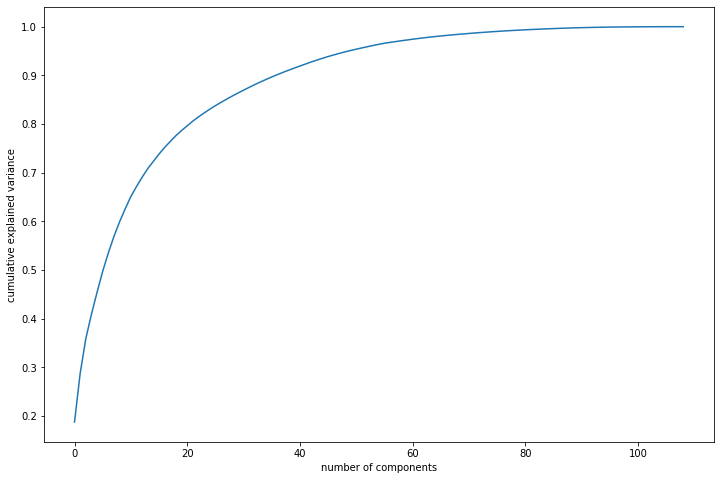

In [87]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [188]:
pca_final = IncrementalPCA(n_components=60)

In [189]:
df_pca = pd.DataFrame(pca_final.fit_transform(X))
df_pca.shape

(1372, 60)

# Model Training and Testing

In [192]:
test_pca.shape()

(1459, 60)

## Linear Regression

In [113]:
lr=LinearRegression()

In [114]:
lr.fit(df_pca,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
y_train_pred = lr.predict(df_pca)

In [116]:
r_squared = r2_score(y_train_pred, y)
r_squared

0.8814574861991102

In [117]:
rms = sqrt(mean_squared_error(y, y_train_pred))
rms

0.12177354188997502

In [118]:
test_set.head()

,1stFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,ExterQual,FireplaceQu,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.312253,0.333333,0.25,0.116708,0.500000,0.0,0.6,0.126168,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.468253,0.500000,0.25,0.230175,0.833333,0.0,0.6,0.189720,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.326139,0.500000,0.25,0.197257,1.000000,0.0,0.8,0.064019,0.333333,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.325285,0.500000,0.25,0.150125,1.000000,0.0,0.6,0.151402,0.333333,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.453388,0.333333,0.25,0.065586,0.833333,0.0,0.8,0.475234,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [120]:
predict1=lr.predict(test_pca)

In [121]:
# lets prepare for the prediction submission
sub = pd.DataFrame()
sub['Id'] = test_df_id
sub['SalePrice'] = predict1
sub.to_csv('submission2.csv',index=False)
print('Exported')

Exported


## Random Forest

In [193]:
rfr= RandomForestRegressor(max_features='auto')

In [194]:
forrest_params = dict(    
    min_samples_split = [n for n in range(2, 11)], 
    min_samples_leaf = [n for n in range(2,11)],     
    n_estimators = [n for n in range(50, 210, 10)],
    max_depth= [n for n in range(2, 11)]
)

In [195]:
rfr_best=GridSearchCV(estimator=rfr, param_grid=forrest_params, cv=5)

In [196]:
rfr_best.fit(df_pca,y)

KeyboardInterrupt: 

In [ ]:
print("Optimal params: {}".format(rfr_best.best_params_))

In [ ]:
y_predict=rfr_best.predict(df_pca)

In [ ]:
r_squared = r2_score(y_predict, y)
r_squared

In [ ]:
rms = sqrt(mean_squared_error(y, y_predict))
rms

In [ ]:
predict2=rfr_best.predict(test_pca)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_df_id
sub['SalePrice'] = np.exp(predict2)
sub.to_csv('submission3.csv',index=False)
print('Exported')

## Adaboost Regression

In [158]:
ada=AdaBoostRegressor()

In [162]:
ada_params = dict(    
    n_estimators = [n for n in range(50, 210, 10)],   
)

In [163]:
ada_best=RandomizedSearchCV(estimator=ada, param_distributions=ada_params, cv=5)

In [164]:
ada_best.fit(df_pca,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'n_estimators': [50, 60, 70, 80, 90,
                                                         100, 110, 120, 130,
                                                         140, 150, 160, 170,
                                                         180, 190, 200]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [165]:
print("Optimal params: {}".format(ada_best.best_params_))

Optimal params: {'n_estimators': 140}


In [166]:
predict3=ada_best.predict(test_pca)

In [167]:
sub = pd.DataFrame()
sub['Id'] = test_df_id
sub['SalePrice'] = np.exp(predict3)
sub.to_csv('submission4.csv',index=False)
print('Exported')

Exported


## Gradient Boosting

In [172]:
gbr=GradientBoostingRegressor()

In [173]:
gbr_params = dict(    
    min_samples_split = [n for n in range(2, 11)], 
    min_samples_leaf = [n for n in range(2,11)],     
    n_estimators = [n for n in range(50, 210, 10)],
    max_depth= [n for n in range(2, 11)],
    learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]    
)

In [174]:
gbr_best=GridSearchCV(estimator=gbr, param_distributions=gbr_params, cv=5)

In [175]:
gbr_best.fit(df_pca,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [176]:
print("Optimal params: {}".format(gbr_best.best_params_))

Optimal params: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 2, 'learning_rate': 0.3}


In [179]:
y_predict1=gbr_best.predict(df_pca)

In [180]:
rms = sqrt(mean_squared_error(y, y_predict1))
rms

0.06803385758587643

In [181]:
predict4=gbr_best.predict(test_pca)

In [182]:
sub = pd.DataFrame()
sub['Id'] = test_df_id
sub['SalePrice'] = np.exp(predict4)
sub.to_csv('submission5.csv',index=False)
print('Exported')

Exported
